In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [34]:
"""
download the patchseq log google doc mouse page as a csv

the data will need to be cleaned up a bit in excel

1. erase all rows that are controls or blanks
2. erase all rows without values for >400
3. add P1 to rows that don't have user name
4. select patch duration column and change all text entries to blanks and then change the format to 
number
5. change the layer column to text and then change all Feb 3 to 2/3 etc. 
6. add column called ">400 normalized to 21 pcr cycles" that =IF(BB2=18, AW2*8,AW2)
7. delete the P8 (or any others) that have a ratio > 1
8. change BRL to P5
9. change file type to xlsx and save as 'Patch-seq log - Mouse PatchSeq.xlsx'
"""

df = pd.read_excel('Patch-seq log - Mouse PatchSeq.xlsx')

In [23]:
#go ahead and look at the dataframe
df.head()

,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,cell type,...,distance to edge,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1,Unnamed: 77
0,170104.0,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,tdt+,...,236,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,"did not aliquot internal, shared",NaN
1,170104.0,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.02,x,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,tdt+,...,99,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
2,170104.0,P1,5,Gad2-IRES-Cre;Ai14-292660.07.01.03,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,tdt+,...,150,79,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
3,170104.0,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.01,?,x,n,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,tdt+,...,84,76,qc,http://lims2/focal_plane_image_series?id=56435...,NaN,NaN,NaN,x,NaN,NaN
4,170104.0,P1,5,Gad2-IRES-Cre;Ai14-292660.08.01.02,x,x,y,2nd Pipette,aCSF III with 1.0 U RNase Inhibitor,tdt+,...,44,76,qc,http://lims2/focal_plane_image_series?id=56435...,63x go,image_qc_passed,NaN,x,NaN,NaN


,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,cell type,...,distance to edge,Plate,20x status,20x LIMS link,63x go no go,63x QC,Confidence,Bad dates,Notes.1,Unnamed: 77
617,170628.0,P8,6,Slc32a1-IRES-Cre;Ai14-327667.05.02.05,x,NaN,na,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,170629.0,P8,6,Slc32a1-IRES-Cre;Ai14-327668.05.02.04,x,NaN,q,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=60187...,NaN,NaN,NaN,NaN,NaN,NaN
620,170630.0,P8,6,Slc32a1-IRES-Cre;Ai14-327669.05.02.04,x,na,q,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=60187...,NaN,NaN,NaN,x,NaN,NaN
621,170816.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341277.04.02.01,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=61388...,NaN,NaN,NaN,NaN,NaN,NaN
622,170816.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341277.04.02.02,x,x,q,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=61388...,63x no go,NaN,NaN,NaN,NaN,NaN
623,170816.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341277.04.02.03,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=61388...,NaN,NaN,NaN,NaN,NaN,NaN
624,170816.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341277.05.02.01,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,qc,http://lims2/focal_plane_image_series?id=61388...,63x go,NaN,NaN,NaN,NaN,NaN
625,170816.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341277.05.02.02,x,x,n,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,170818.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341280.04.02.01,x,NaN,n,NaN,NaN,tdt+,...,NaN,NaN,passed,http://lims2/focal_plane_image_series?id=61388...,NaN,NaN,NaN,NaN,NaN,NaN
627,170818.0,P8,7,Ndnf-IRES2-dgCre;Ai14-341280.04.02.02,x,NaN,n,NaN,NaN,tdt+,...,NaN,NaN,passed,http://lims2/focal_plane_image_series?id=61388...,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df['Layer'].unique()

array([None, 'layer 4', 'layer 2/3', 'layer 5', 'layer 1', 'layer 6',
       'layer 5a', 'layer 6a', 'layer 6b'], dtype=object)

In [19]:
"""
More formatting and data cleaning
"""

df['Date'] = df['Date'].apply(lambda x: None if x > 190101 else x)
df['Date'] = df['Date'].fillna(0)
df['date_format'] = df['Date'].map(lambda x: pd.to_datetime(str(int(x)), format = '%y%m%d'))

dic = {
    'No-Seal' : 'No-Seal',
    'Partial-Nucleus': 'Partial-Nucleus',
    'Outside-Out': 'Outside-Out',
    'nr': 'missing',
    'Nucleated': 'Nucleated',
    'Nucleus': 'Nucleated',
    'Entire-Cell': 'Entire-Cell',
    'Entire cell': 'Entire-Cell',
    'outside-out':'Outside-Out',
    'Outside-Out?': 'Outside-Out',
    'Outside-out': 'Outside-Out',
    'no-seal': 'No-Seal',
    'nucelated': 'Nucleated',
    'no -seal': 'No-Seal',
    'missing': 'missing',
    'nan': 'missing',
    'nucleus_absent': 'Partial-Nucleus',
    'nucleus_present': 'Nucleated',
    'no_nucleus_visible': 'No-Seal',
    'nucleus_visible': 'No-Seal',
    'entire_cell': 'Entire-Cell'
    }


did = {
    'P1': 'P1',
    'P2': 'P2',
    'P3': 'P3',
    'P4': 'P4',
    'P5': 'P5',
    'P6': 'P6',
    'P6 ': 'P6',
    'P8': 'P8',
    'P9': 'P9',
    'PA': 'PA',
    'PB': 'PB'
}

die = {
    'n': 'No',
    'z': 'N/A',
    'y': 'Yes',
    'na': 'N/A',
    'q': 'Questionable',
    'x': 'Yes',
    '?': 'Questionable',
    ' n': 'No',
    'processing' : 'Yes'
}


df['Post patch?'] = df['Post patch?'].fillna('missing')
df['Post patch?'] = df['Post patch?'].map(lambda x: dic[x])

df['Morph'] = df['Morph'].fillna('n')
df['patch duration'] = df['patch duration'].fillna(0)

df['User'] = df['User'].map(lambda x: did[x])
df['Morph'] = df['Morph'].map(lambda x: die[x])
df['<400 normalized to 21 pcr cycles'] = df[['<400','PCR cycles']].apply(lambda x: x['<400']* 8 if x['PCR cycles'] == 18 else x['<400'], axis = 1)

ValueError: time data '0' does not match format '%y%m%d' (match)

In [39]:
df = df.sort(columns = 'User')

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [54]:
sns.lmplot(x = '<400 normalized to 21 pcr cycles', y = '>400 normalized to 21 pcr cycles', data = df[(df['Trans'] == 'x')], fit_reg = False, 
           hue = 'User', col = 'User', scatter_kws = {'alpha':.5}, col_wrap = 4,palette = 'Paired')

plt.xlim(-100,5000)
plt.ylim(-100,5000)
#plt.savefig('cDNA_by_User.png')

KeyError: "['<400 normalized to 21 pcr cycles'] not in index"

In [ ]:
temp = df.sort(columns = ['User', 'Date']).reset_index(drop = True)

users = []
temp['order'] = None
for i in range(len(temp)):
    if temp['User'].iloc[i] in users:
        order = (i-df_length) * (1.0/len(temp[temp["User"] == user]))
        temp['order'].iloc[i] = round(order,2)
    else:
        users.append(temp['User'].iloc[i])
        
        #don't want to include this length in the count or it will give negative values for P1
        df_length = -len(temp[temp['User'] == (temp['User'].iloc[i])])
        for user in users:
            df_length += len(temp[temp['User'] == user])
        
        order = (i-df_length) * (1.0/len(temp[temp["User"] == user]))
        temp['order'].iloc[i] = round(order,2)


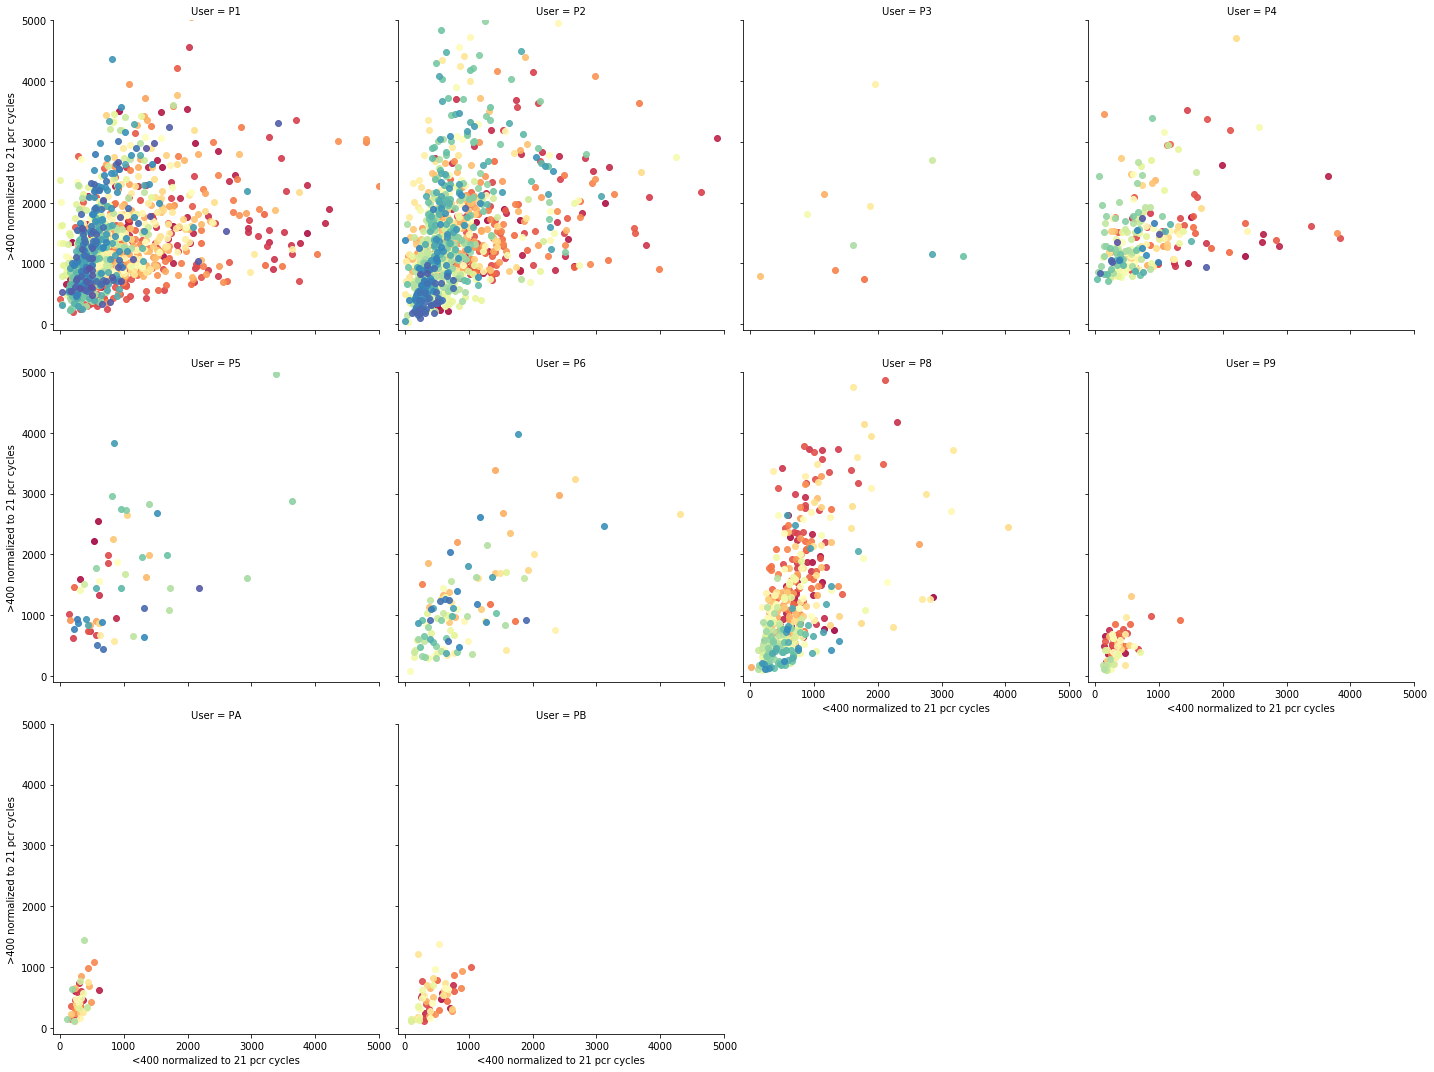

In [77]:
sns.lmplot(x = '<400 normalized to 21 pcr cycles', y = '>400 normalized to 21 pcr cycles', data = temp[temp['Trans'] == 'x'], fit_reg = False, 
           hue = 'order', col = 'User', scatter_kws = {'alpha':.9}, col_wrap = 4, legend = False, palette = 'Spectral')
plt.xlim(-100,5000)
plt.ylim(-100,5000)
plt.savefig('cDNA_learning_curve.png')

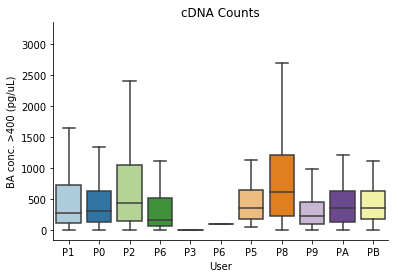

In [58]:
sns.boxplot(x = 'User', y = 'BA conc. >400 (pg/uL)', 
               data = df[df['BA conc. >400 (pg/uL)'] < 3200],
               fliersize = 0, palette = 'Paired').set_title('cDNA Counts')
sns.despine()
plt.savefig('boxplot.png')

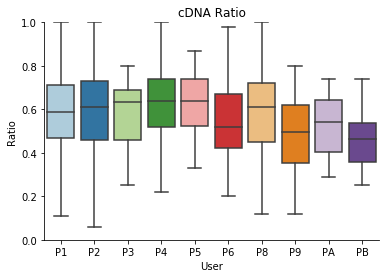

In [42]:
sns.boxplot(x = 'User', y = 'Ratio', 
               data = df, #scale = 'area', 
               fliersize = 0,  palette = 'Paired').set_title('cDNA Ratio')
sns.despine()
plt.ylim(0,1)
plt.savefig('violinplot_2.png')

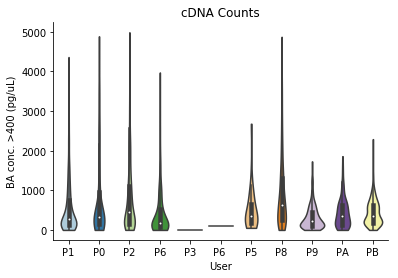

In [59]:
sns.violinplot(x = 'User', y = 'BA conc. >400 (pg/uL)', 
               data = df[df['BA conc. >400 (pg/uL)'] < 5000],
               scale = 'area', cut = 0, palette = 'Paired').set_title('cDNA Counts')
sns.despine()
plt.savefig('violinplot_1.png')

In [60]:
colors = {
    'P1': '#a6cee3',
    'P2': '#1f78b4',
    'P3': '#b2df8a',
    'P4': '#33a02c',
    'P5': '#fb9a99',
    'P6': '#e31a1c',
    'P8': '#fdbf6f',
    'P9': '#ff7f00',
    'PA': '#cab2d6',
    'PB': '#6a3d9a'
}

In [61]:
for i, user in enumerate(sorted(df['User'].unique())):
    cells = float(len(df[df['User'] == user]))
    days = len(df[df['User'] == user]['Date'].unique())
    plt.bar(i, cells/days, color = colors[user])
plt.xticks(np.arange(0,i +1),sorted(df['User'].unique()))
plt.ylabel('Number of Cells')
plt.title('Cells Patched Per Day')

ZeroDivisionError: float division by zero

In [62]:
cpd = []
resolutions = []
plt.figure(figsize=(5,5))

for user in sorted(df['User'].unique()):
    cells = float(len(df[df['User'] == user]))
    days = len(df[df['User'] == user]['Date'].unique())
    cpd.append(cells/days)
    resolution = df[df['User'] == user]['Resolution index'].mean()
    resolutions.append(resolution)
    
    #size of dot will be percentage of cells patched that have transcriptomics and morphologies
    size = len(df[(df['User'] == user) & (df['Trans'] == 'x') & (df['Morph'] == 'Yes')])/cells
    plt.scatter(cells/days, resolution, label = user, s = size*500, color = colors[user])

#add in lines for quadrants based on the mean values
plt.plot([0,10],[np.mean(resolutions),np.mean(resolutions)], color = 'lightgrey')
plt.plot([np.mean(cpd),np.mean(cpd)],[0,1], color = 'lightgrey')

#adjust the scope of the viz by the vaules so the quadrant lines don't scew it
plt.xlim(np.min(cpd)*.95, np.max(cpd)*1.05)
plt.ylim(np.min(resolutions)*.95, np.max(resolutions)*1.05)

plt.xlabel('Cells Patched Per Day')
plt.ylabel('Avg. Resolution Index')
plt.title('Patcher Metrics')
sns.despine()
#plt.legend(loc='center left', bbox_to_anchor=(.9, 0.3))
plt.savefig('Patcher Metrics.png')

ZeroDivisionError: float division by zero

In [63]:
alex_df = df[df['User'] == 'P4']
not_alex_df = df[df['User'] != 'P4']

plt.scatter(not_alex_df['<400 normalized to 21 pcr cycles'], not_alex_df['>400 normalized to 21 pcr cycles'], color = 'grey', alpha = .1, label = 'Everyone Else')
plt.scatter(alex_df['<400 normalized to 21 pcr cycles'], alex_df['>400 normalized to 21 pcr cycles'], color = '#33a02c', label = 'P4', alpha = .4)
plt.legend()
plt.xlim(-100,10000)
plt.ylim(-100,10000)
sns.despine()
plt.xlabel('Less Than 400 bp Counts')
plt.ylabel('More Than 400 bp Counts\n(normalized to 21 PCR cycles)')
plt.title('Comparing One User to the Group')
plt.savefig('P4_cDNA.png')

KeyError: '<400 normalized to 21 pcr cycles'

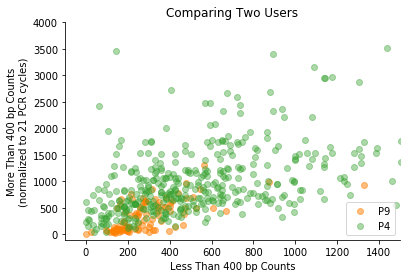

In [48]:
#Lisa was called out in the last week for having a distinct bimodal distribution
lisa_df = df[df['User'] == 'P9']
alex_df = df[df['User'] == 'P4']

plt.scatter(lisa_df['<400 normalized to 21 pcr cycles'], lisa_df['>400 normalized to 21 pcr cycles'], color = '#ff7f00', alpha = .5, label = 'P9')
plt.scatter(alex_df['<400 normalized to 21 pcr cycles'], alex_df['>400 normalized to 21 pcr cycles'], color = '#33a02c', label = 'P4', alpha = .4)
plt.legend()
plt.xlim(-100,1500)
plt.ylim(-100,4000)
sns.despine()
plt.xlabel('Less Than 400 bp Counts')
plt.ylabel('More Than 400 bp Counts\n(normalized to 21 PCR cycles)')
plt.title('Comparing Two Users')
plt.savefig('P4_P8_cDNA.png')

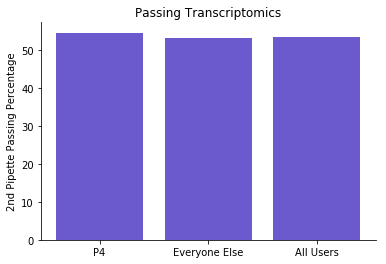

In [49]:
y = [float(len(alex_df[alex_df['Trans'] == 'x']))/len(alex_df) * 100,
    float(len(not_alex_df[not_alex_df['Trans'] == 'x']))/len(not_alex_df) * 100,
     float(len(df[df['Trans'] == 'x']))/len(df) * 100]

plt.bar([1,2,3], y, color = 'slateblue')
plt.xticks([1,2,3],['P4', 'Everyone Else', 'All Users'])
sns.despine()
plt.ylabel('2nd Pipette Passing Percentage')
plt.title('Passing Transcriptomics')
plt.savefig('2nd Pipette')

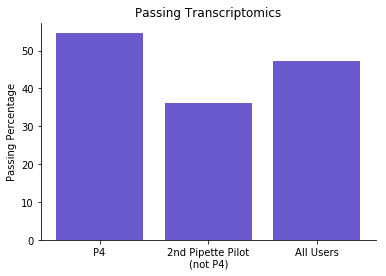

In [50]:
end = df[df['Pilot'] == '2nd Pipette']['Date'].max()
start = df[df['Pilot'] == '2nd Pipette']['Date'].min()

temp_df = df[df['Date'] <= end]
y = [float(len(alex_df[alex_df['Trans'] == 'x']))/len(alex_df) * 100,
    float(len(not_alex_df[(not_alex_df['Trans'] == 'x') & (not_alex_df['Pilot'] == '2nd Pipette')]))/len(not_alex_df[not_alex_df['Pilot'] == '2nd Pipette']) * 100,
     float(len(temp_df[temp_df['Trans'] == 'x']))/len(temp_df) * 100]

plt.bar([1,2,3], y, color = 'slateblue')
plt.xticks([1,2,3],['P4', '2nd Pipette Pilot\n(not P4)', 'All Users'])
sns.despine()
plt.ylabel('Passing Percentage')
plt.title('Passing Transcriptomics')
plt.savefig('2nd Pipette')

In [51]:
df.Trans.unique()

array([u'x', nan, u'na', u'TT'], dtype=object)

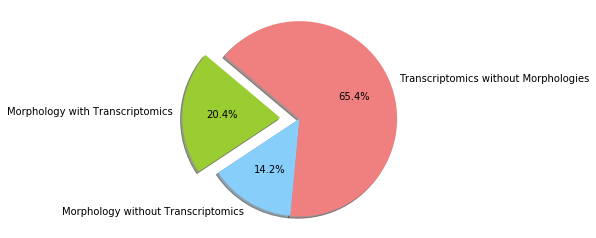

In [52]:
labels = 'Morphology with Transcriptomics', 'Morphology without Transcriptomics', 'Transcriptomics without Morphologies'
sizes = [len(df[(df['Morph'] =='Yes') & (df['Trans'] == 'x')]), 
         len(df[(df['Morph'] =='Yes') & (df['Trans'] != 'x')]),
         len(df[(df['Morph'] !='Yes') & (df['Trans'] == 'x')]),
        ]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0.2, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
#plt.legend(patches, labels, loc="best")
plt.show()

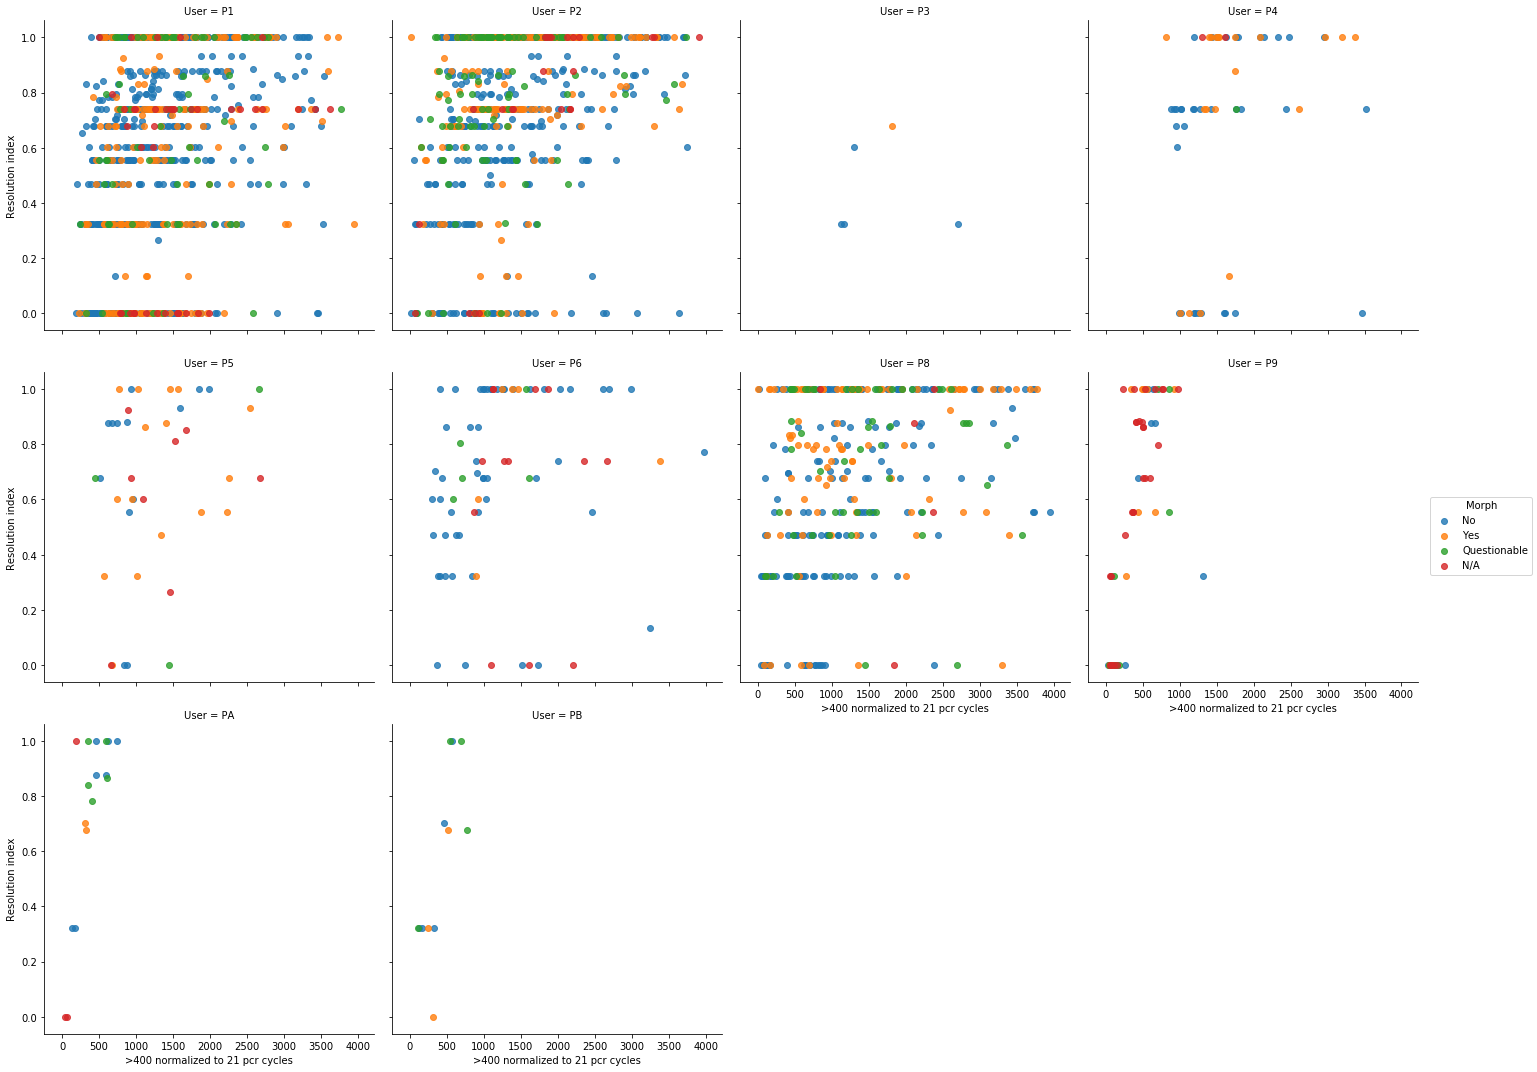

In [53]:
sns.lmplot(x = '>400 normalized to 21 pcr cycles', y ='Resolution index',
           data = df[df['>400 normalized to 21 pcr cycles'] < 4000], 
           col = 'User', fit_reg = False, hue = 'Morph', col_wrap = 4)

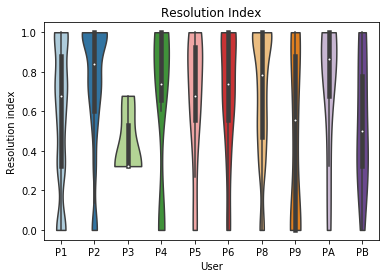

In [20]:
sns.violinplot(x = 'User', y = 'Resolution index', 
               data = df, scale = 'area',
               cut = 0, palette = 'Paired').set_title('Resolution Index')

In [21]:
df['Cre_line_guess'] = df['File'].map(lambda x: str(x).split('-')[0])
df['Cre_line_guess'] = df['Cre_line_guess'].map(lambda x: str(x).split(' ')[0])

In [22]:
df[df['Resolution index'] == 1]['Cre_line_guess'].unique()

array(['Rbp4', 'Cux2', 'Ndnf', 'Slc32a1', 'Vip', 'Glt25d2', 'Gad2',
       'Pvalb', 'Scnn1a', 'Rorb', 'Nr5a1', 'Slc17a8', 'Sst', 'Slc17a6',
       'Chrna2', 'Nos1/Sst', 'Penk', 'Chat', 'Nos1', 'Htr3a', 'Ntsr1',
       'Vipr2', 'Ctgf', 'Oxtr', 'nan'], dtype=object)

In [23]:
cell_type = {
    'Rbp4', 'VIp',
       'Scnn1a', 'Htr3a', 'Slc32a1', None, 'Gad2', 'Ntsr1', 'Penk',
       'Pvalb', 'Sst', 'Vipr2', 'Nr5a1', 'Cux2', 'Chrna2', 'Slc17a8',
       'Glt25d2', 'Ctgf', 'Nkx2', 'Oxtr', 'Sim1', 'Pdyn', 'Tlx3',
    'Ndnf': 'inhibitory', 
    'Vip': 'inhibitory', 
    'Rorb': 'excitatory', 
    'Chat': 'inhibitory', 
    'Nos1': 'inhibitory', 
    'Nos1/Sst': 'inhibitory', 
    'Htr3a': 'inhibitory', 
    'Gad2': 'inhibitory',
    'Ntsr1': 'excitatory', 
    'Penk': 'inhibitory', 
    'Slc32a1': 'inhibitory', 
    'Rbp4': 'excitatory', 
    'Pvalb': , 'nan', 'Sst',
       'Slc17a6', 'Scnn1a', 'Nr5a1', 'Cux2', 'Chrna2', 'Slc17a8',
       'Glt25d2', 'Vipr2', 'Ctgf', 'Oxtr', 'Sim1']
}

SyntaxError: invalid syntax (<ipython-input-23-62383fcb5277>, line 6)

In [24]:
bad_cre = ['294816.03.01.01','294816.03.01.02', '294816.03.01.03', '294816.03.01.04', 
           'cortical', 'pipette', 'internal', 'aCSF', 
        'nan',  'rusty', 'Rm_160727_01',
       'Rm_160727_04', 'brl_170112_03', 'brl_170112_02', 'brl_170112_01',
       'Rm_160727_02', 'Rm_160727_03', 'brl_170807_01', 'brl_170807_03',
       'brl_170807_02', 'WT', 'na', 'brl_141029_05', 'brl_141029_04',
       'brl_141029_03', 'brl_141029_02', '141125', 'brl_141029_06',
       'brl_150323_06', 'brl_141029_07', 'brl_150324_03',
       'brl_150324_02', 'brl_150324_01', 'brl_150323_07', 'brl_150908_01',
       'no', '150101', '1500108', 'brl_150323_05', 'brl_150323_04',
       'brl_150323_03', 'brl_150323_02', 'brl_150323_01', 'brl_160726_01',
       'brl_160726_02', 'brl_141029_01', 'brl_141107_02', 'brl_150406_07',
       'brl_150406_05', 'brl_150406_04', 'brl_150406_03', 'brl_150406_21',
       'brl_150406_01', 'brl_141107_01', 'brl_150908_02', 'brl_150908_03',
       'brl_150908_04', 'brl_150908_05', 'brl_150909_01', 'brl_141107_06',
       'brl_141107_05', 'brl_141107_04', 'brl_141107_03', 'brl_150909_02',
       'brl_150909_03', 'brl_150909_04', 'brl_150909_05', 'brl_150909_06',
       'brl_150909_07', 'brl_141106_06', 'brl_141106_05', 'brl_141106_04',
       'brl_150325_06', 'brl_150324_05', 'brl_150324_07', 'brl_150324_06',
       'brl_150324_04', 'brl_150325_07', 'brl_141105_01', 'brl_141106_03',
       'brl_141106_02', 'brl_141106_01', 'brl_141105_03b', 'brl_150325_09',
       'brl_150325_08', 'brl_141105_03a', 'brl_150406_08', 'brl_150220_03',
       'brl_150220_02', 'brl_150220_01', 'brl_150220_04', '150109', 'Nrsr',
       'brl_170407_07', 'brl_170410_01', 'brl_170410_02', 'brl_150220_06',
       'brl_150220_05', '150123', '150211', 'failure', '']

for cre in bad_cre:
    df['Cre_line_guess'] = df['Cre_line_guess'].apply(lambda x: None if x == cre else x)

df['Cre_line_guess'] = df['Cre_line_guess'].apply(lambda x: 'Vip' if x == 'VIp' else x)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

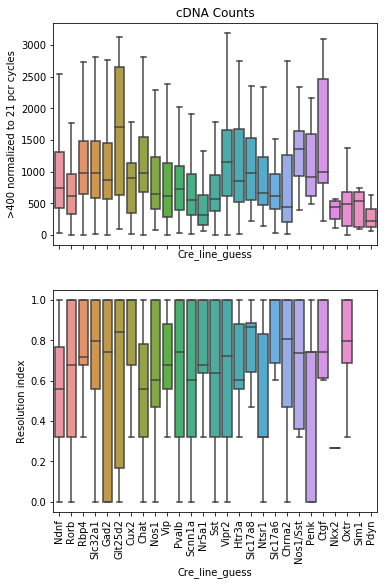

In [25]:
f, axes = plt.subplots(2,1, figsize = (5.8,9), sharex = True)
sns.boxplot(x = 'Cre_line_guess', y = '>400 normalized to 21 pcr cycles', 
               data = df[df['>400 normalized to 21 pcr cycles'] < 3200],
               fliersize = 0, ax = axes[0]).set_title('cDNA Counts')
#ax1.set_xticks(rotation = 90)
sns.boxplot(x = 'Cre_line_guess', y = 'Resolution index', 
               data = df[df['>400 normalized to 21 pcr cycles'] < 3200],
               fliersize = 0, ax = axes[1])
plt.xticks(rotation=90)

In [26]:
df.sort(columns = 'User')

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,...,Stacis call for class,Confidence,Bad dates,Notes.1,Unnamed: 77,Unnamed: 78,Unnamed: 79,date_format,<400 normalized to 21 pcr cycles,Cre_line_guess
2754,NaN,170302,P1,6,Ndnf-IRES2-dgCre;Ai14-303177.04.02.03,x,x,No,Tolias protocol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-02,968.000,Ndnf
507,NaN,160518,P1,NaN,Chat-IRES-Cre;Ai14-245956.06.01.02,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-18,448.000,Chat
878,NaN,160819,P1,NaN,Ntsr1-Cre;Ai14-265075.04.01.04,x,x,Yes,NaN,NaN,...,spiny,truncated?,NaN,NaN,NaN,NaN,NaN,2016-08-19,1080.000,Ntsr1
877,NaN,160819,P1,NaN,Ntsr1-Cre;Ai14-265075.04.01.03,x,NaN,Yes,NaN,NaN,...,spiny,truncated?,NaN,NaN,NaN,NaN,NaN,2016-08-19,408.000,Ntsr1
876,NaN,160819,P1,NaN,Ntsr1-Cre;Ai14-265075.04.01.02,x,NaN,Yes,NaN,NaN,...,spiny,truncated?,NaN,NaN,NaN,NaN,NaN,2016-08-19,2000.000,Ntsr1
875,NaN,160819,P1,NaN,Ntsr1-Cre;Ai14-265075.04.01.01,x,x,Yes,NaN,NaN,...,spiny,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-19,5888.000,Ntsr1
509,NaN,160518,P1,NaN,Chat-IRES-Cre;Ai14-245956.04.01.01,NaN,x,No,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2016-05-18,3696.000,Chat
510,NaN,160518,P1,NaN,Chat-IRES-Cre;Ai14-245956.04.01.02,x,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-18,1248.000,Chat
511,NaN,160518,P1,NaN,Chat-IRES-Cre;Ai14-245956.04.01.03,x,NaN,No,NaN,NaN,...,n,werid little cell,NaN,NaN,NaN,NaN,NaN,2016-05-18,608.000,Chat
512,NaN,160519,P1,NaN,Htr3a-Cre_NO152;Ai14-246124.06.01.01,x,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-19,408.000,Htr3a


C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  import sys


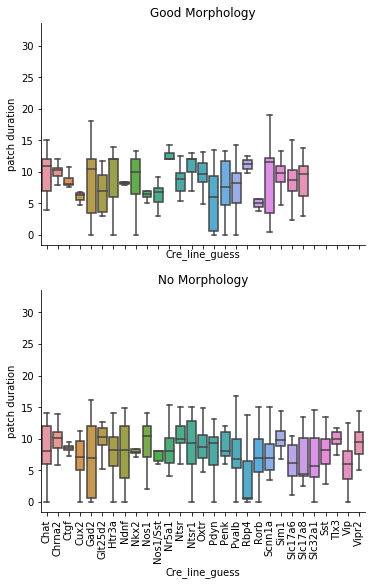

In [27]:
f, axes = plt.subplots(2,1, figsize = (5.8,9), sharex = True,sharey=True)
sns.boxplot(x = 'Cre_line_guess', y = 'patch duration', 
               data = df[df['Morph'] =='Yes'].sort(columns = 'Cre_line_guess'),
               fliersize = 0, ax = axes[0]).set_title('Good Morphology')
#ax1.set_xticks(rotation = 90)
sns.boxplot(x = 'Cre_line_guess', y = 'patch duration', 
               data = df[df['Morph'] =='No'].sort(columns = 'Cre_line_guess'),
               fliersize = 0, ax = axes[1]).set_title('No Morphology')
plt.xticks(rotation=90)
sns.despine()
f.savefig('morph.png')

In [72]:
df['Cre_line_guess'].unique()

array(['Ndnf', 'Rorb', 'Rbp4', 'Slc32a1', 'Gad2', 'Glt25d2', 'Cux2',
       'Chat', 'Nos1', 'Vip', 'Pvalb', 'Scnn1a', 'Nr5a1', 'Sst', 'Vipr2',
       'Htr3a', 'Slc17a8', 'Ntsr1', 'Slc17a6', 'Chrna2', '294816.03.01.01',
       '294816.03.01.02', '294816.03.01.03', '294816.03.01.04', 'Nos1/Sst',
       'Penk', 'cortical', 'pipette', 'internal', 'aCSF', 'Ctgf', 'Nkx2',
       'Oxtr', 'Sim1', 'Tlx3', 'nan', 'Pdyn', 'rusty', 'Rm_160727_01',
       'Rm_160727_04', 'brl_170112_03', 'brl_170112_02', 'brl_170112_01',
       'Rm_160727_02', 'Rm_160727_03', 'brl_170807_01', 'brl_170807_03',
       'brl_170807_02', 'WT', 'na', 'brl_141029_05', 'brl_141029_04',
       'brl_141029_03', 'brl_141029_02', 'VIp', '141125', 'brl_141029_06',
       'brl_150323_06', 'Ntsr', 'brl_141029_07', 'brl_150324_03',
       'brl_150324_02', 'brl_150324_01', 'brl_150323_07', 'brl_150908_01',
       'no', '150101', '1500108', 'brl_150323_05', 'brl_150323_04',
       'brl_150323_03', 'brl_150323_02', 'brl_150323_01', '

In [11]:
df['Cre_line_guess'].unique()

array(['Ndnf', 'Rorb', 'Rbp4', 'Slc32a1', 'Gad2', 'Glt25d2', 'Cux2',
       'Chat', 'Nos1', 'Vip', 'Pvalb', 'Scnn1a', 'Nr5a1', 'Sst', 'Vipr2',
       'Htr3a', 'Slc17a8', 'Ntsr1', 'Slc17a6', 'Chrna2', None, 'Nos1/Sst',
       'Penk', 'Ctgf', 'Nkx2', 'Oxtr', 'Sim1', 'Tlx3', 'Pdyn', 'VIp',
       'Ntsr'], dtype=object)

In [75]:

plt.figure(figsize = (20,4))
x = np.arange(0,len(df["Date"].unique()))
bottom = np.zeros(len(df['Date'].unique()))
for i, user in enumerate(sorted(df['User'].unique())):
    y = [len(df[(df['Date'] == date) & (df['User'] == user)]) for date in df['Date'].unique()]
    y2 = y+bottom
    plt.fill_between(x, bottom, y2,where=y2 > bottom, facecolor=colors[user], interpolate=True, label = user)
                #color = colors[user], label = user)
    bottom += y

plt.legend()
sns.despine()
plt.xlim(0,)
plt.ylabel("Cells Patched")
#plt.title('PrePipeline Patching')
plt.savefig('Patches over time.png')

TypeError: list indices must be integers, not str

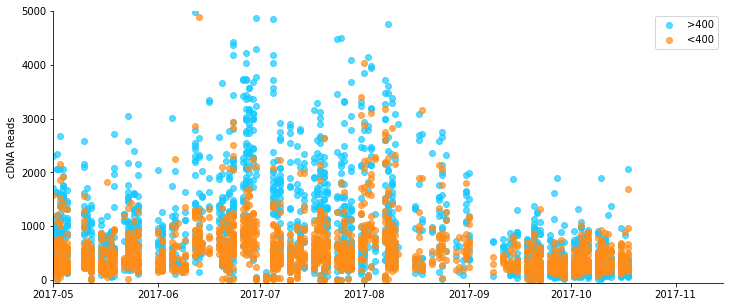

In [76]:
plt.figure(figsize = (12,5))
plt.plot_date(df['date_format'], df['>400 normalized to 21 pcr cycles'], alpha = .7, color = '#17c9ff', label = '>400')
plt.plot_date(df['date_format'], df['<400 normalized to 21 pcr cycles'], alpha = .7, color = '#ff8c19', label = '<400')
plt.legend()
plt.ylim(-50,5000)
plt.xlim(datetime.strptime('170501', '%y%m%d'),datetime.strptime('171115', '%y%m%d'))
sns.despine()
plt.ylabel('cDNA Reads')
plt.savefig('cDNA over time.png')

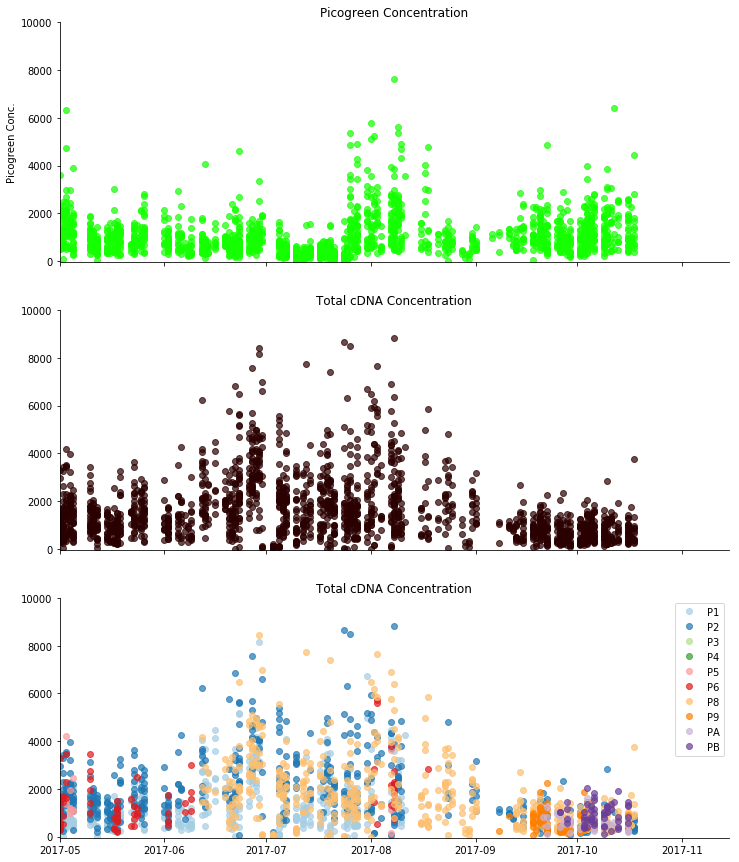

In [98]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12,15), sharex = True)

ax1.plot_date(df['date_format'], df['Picogreen'], alpha = .7, color = '#14FF00', label = 'Picogreen Conc.')
ax2.plot_date(df['date_format'], df['Conc.'], alpha = .7, color = '#2B0000', label = 'Total Concentration')
for user in df['User'].unique():
    ax3.plot_date(df[df['User'] == user]['date_format'], df[df['User'] == user]['Conc.'], alpha = .7, color = colors[user], label = user)

#plt.plot_date([datetime.strptime('170901', '%y%m%d'),datetime.strptime('170901', '%y%m%d')], [-1000,16000], color = 'black', linestyle = 'solid')
plt.legend()
ax1.set_ylim(-50,10000)
ax2.set_ylim(-50,10000)
ax3.set_ylim(-50,10000)

ax1.set_title('Picogreen Concentration')
ax2.set_title('Total cDNA Concentration')
ax3.set_title('Total cDNA Concentration')

plt.xlim(datetime.strptime('170501', '%y%m%d'),datetime.strptime('171115', '%y%m%d'))
sns.despine()
ax1.set_ylabel('Picogreen Conc.')
plt.savefig('brian_fig.png')

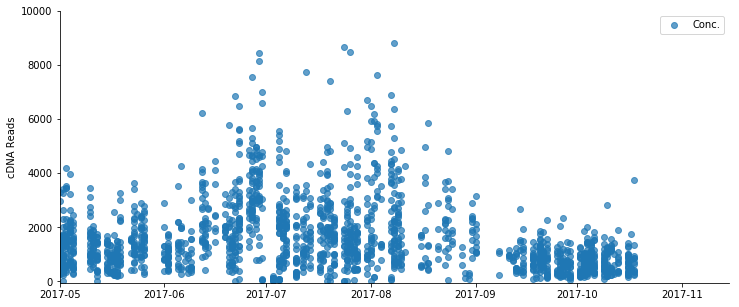

In [80]:
plt.figure(figsize = (12,5))
plt.plot_date(df['date_format'], df['Conc.'], alpha = .7,)
#plt.plot_date([datetime.strptime('170901', '%y%m%d'),datetime.strptime('170901', '%y%m%d')], [-1000,16000], color = 'black', linestyle = 'solid')
plt.legend()
plt.ylim(-50,10000)
plt.xlim(datetime.strptime('170501', '%y%m%d'),datetime.strptime('171115', '%y%m%d'))
sns.despine()
plt.ylabel('cDNA Reads')
#plt.savefig('cDNA over time.png')

In [21]:
df['Conc. normalized to 21 pcr cycles'] = df[['Conc.','PCR cycles']].apply(lambda x: x['Conc.']* 8 if x['PCR cycles'] == 18 else x['Conc.'], axis = 1)

(-50, 10000)

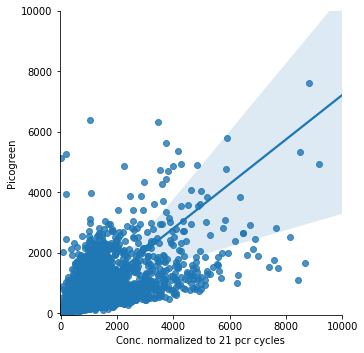

In [22]:
sns.lmplot(x = 'Conc. normalized to 21 pcr cycles', y = 'Picogreen', data = df)
plt.xlim(-50, 10000)
plt.ylim(-50, 10000)

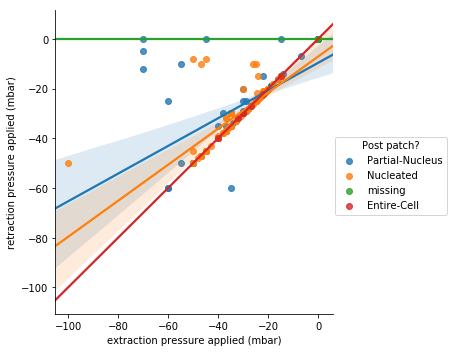

In [77]:
df['retraction pressure applied (mbar)'] = df['retraction pressure applied (mbar)'].apply(lambda x: 0 if type(x) == unicode else x)
df['retraction pressure applied (mbar)'] = df['retraction pressure applied (mbar)'].apply(lambda x: -abs(x))
df['extraction pressure applied (mbar)'] = df['extraction pressure applied (mbar)'].apply(lambda x: -abs(x))

df['extraction pressure applied (mbar)'] = df['extraction pressure applied (mbar)'].apply(lambda x: 0 if type(x) == unicode else x)
df['retraction pressure applied (mbar)'] = df['retraction pressure applied (mbar)'].fillna(0)
df['extraction pressure applied (mbar)'] = df['extraction pressure applied (mbar)'].fillna(0)


sns.lmplot(x = 'extraction pressure applied (mbar)',
           y = 'retraction pressure applied (mbar)',
           data = df[df['Date'] > 171010],
           hue = 'Post patch?',
           fit_reg = True)


In [66]:
df.columns